# Chapter 2. Maximum likelihood estimation for Mixture Models

## 1. EM Algorithm for Mixture Model

### 1.1 Estimation of weights $w_k$


- find an Observed Data Likelihood in Chapter 1.

$$L(\tilde{w}, \tilde{\theta} | \tilde{x}) = \prod_{i=1}^{n} \sum_{k=1}^K w_k g_k (x_i |\theta_k )$$

- we define $k$-th MLE of $L(\tilde{w}, \tilde{\theta} | \tilde{x})$

$$(\hat{\theta_k}, \hat{w_k} ) = \underset{\theta_k, ... , w_k}{argmax} L(\tilde{w}, \tilde{\theta} | \tilde{x})$$

- To estimate the MLE, we need to find the partial derivative of $L(\tilde{w}, \tilde{\theta} | \tilde{x})$
subject to $\sum w_k = 1$ (Lagrange Multiplier)

$$L(\tilde{w}, \tilde{\theta} | \tilde{x}) = \prod_{i=1}^n \sum_{k=1}^K w_k g_k (x_i |\theta_k )$$

$$l(\tilde{w}, \tilde{\theta} | \tilde{x}) = \sum_{i=1}^n log(\sum_{k=1}^K w_k g_k (x_i |\theta_k )) \\ 

subject \ to \  \sum_{k=1}^K w_k = 1 $$


$$loss = l(\tilde{w}, \tilde{\theta} | \tilde{x}) + \lambda(\sum_{k=1}^K w_k -1), w_k \geq 0 $$

$$ S_k = \sum_{i=1}^{n} {g_k (x_i) \over f(x_i) } + \lambda, w_k \geq 0$$

- Also, we can use the trick that eliminate one of the weights

$$w_K = 1- w_1 - w_2 ... - w_{K-1}$$

$$l(\tilde{w} , \tilde{\theta} | \tilde{x}) = \sum_{i=1}^n log(\sum_{k=1}^{K} w_k g_k (x_i |\theta_k )) $$

$$S_k = {\partial l(\tilde{w} , \tilde{\theta} | \tilde{x}) \over \partial w_k} = \sum_{i=1}^{n} {g_k(x_i) - g_K(x_i ) \over f(x_i)} , w_k \geq 0$$

$$ S_k =  \sum_{i=1}^{n} {g_k (x_i) \over f(x_i) } + \lambda = \sum_{i=1}^{n} {g_k(x_i) - g_K(x_i ) \over f(x_i)} $$

$$\Leftrightarrow$$

$$\lambda = -\sum{f_K(x_i) \over f(x_i)}$$



- obtain a point such that $S_k$ = 0 as the $k$-th MLE of $l(\tilde{w}, \tilde{\theta} | \tilde{x})$

$$S_k = \sum_i {g_k(x_i)\over f(x_i)} - \sum_i {g_K(x_i) \over f(x_i)} = 0$$

$$\Leftrightarrow \sum_i {g_k(x_i)\over f(x_i)} = \sum_i {g_K(x_i) \over f(x_i)}$$

$$\Leftrightarrow \sum_i {g_k(x_i)\over f(x_i)} w_k = \sum_i {g_K(x_i) \over f(x_i)} w_k$$

$$\Leftrightarrow \sum_k \sum_i {g_k(x_i)\over f(x_i)} w_k = \sum_k 
\sum_i {g_K(x_i) \over f(x_i)} w_k$$

- Since $f(x_i) = \sum_k w_k g_k(x_i)$, then 

$$ \sum_k { w_k g_k (x_i )\over f(x_i )} = 1$$

- Thus, 

$$N = \sum_i {g_K(x_i) \over f(x_i)} \cdot 1$$

$$ \Rightarrow $$

$$w_k = \cdot N^{-1} \cdot \sum_i { w_k g_k (x_i)\over f(x_i )}$$





### 1.2 Estimation of parameters of $k$-th component $\theta_k$

$$U_k = {\partial l(\tilde{w} , \tilde{\theta} | \tilde{x}) \over \partial \theta_k} = \sum_{i=1}^n {w_k g'_k (x_i) \over f(x_i) } $$

- Let $h(x_i ; \theta_k) = w_k g_k(x_i)$

$$0 = \sum_{i=1}^n ({h(x_i ; \theta_k) \over f(x_i)  })({g'_k(x_i)  \over g_k(x_i)})$$

- We just need to solve the following equation to estimate the parameter.

$$ v(x_i ; \theta_k) = {g'_k (x_i) \over g_k(x_i)} $$

- We shall view $w_k$ as the prior probability of $C_i = k$, and the quantity ${w_k g_k(x_i) \over f(x_i)} = {h(x_i; \theta_k ) \over f(x_i)} = P(C_i = k | x_i) = \gamma_{ik}  $  as the corresponding posterior probability once we have observed $x_i$ 

- $\gamma_{ik}$ can also be viewed as the **_responsibility_** that component $k$ takes for ‘explaining’
the observation $x_i$.







### 1.3 EM Algorithm

- Assume that all paramters are related to the  $ \gamma_{ik}$

- Process

1. Initialize parameters : $\tilde{\theta}^{(0)} , \tilde{w}^{(0)}$

2. Expectation Step ($t$ step)


$${w^{(t)}_k g_k(x_i ; \theta^{(t)} ) \over f(x_i)} = {h(x_i; \theta^{(t)}_k , w^{(t)}_k ) \over f(x_i)} = \gamma^{(t)}_{ik}  $$

3. Maximization Step ($t$ step)

$$w^{(t)}_k = \cdot N^{-1} \cdot \sum_i { w^{(t-1)}_k g_k (x_i; \theta^{(t-1)}_k)\over f(x_i )}$$


$$\theta_{k}^{(t)}\ is \ provided \ by \ U_k = 0$$




### 1.4 EM Algorithm of Gaussian Mixture Model

- Assume that all paramters are related to the  $ \gamma_{ik}$

- Process

1. Initialize parameters : $\tilde{\mu}^{(0)}, \Sigma^{(0)} , \tilde{w}^{(0)}$

2. Expectation Step ($t$ step)


$${w^{(t)}_k g_k(x_i ; \theta^{(t)} ) \over f(x_i)} = {h(x_i; \theta^{(t)}_k , w^{(t)}_k ) \over f(x_i)} = \gamma^{(t)}_{ik}  $$

3. Maximization Step ($t$ step)
    
> $w_k$

$$w^{(t)}_k = \cdot N^{-1} \cdot \sum_i { w^{(t-1)}_k g_k (x_i; \theta^{(t-1)}_k)\over f(x_i )}$$

> $\mu_k$    

$$ v(x_i ; \mu_k) = {g'_k (x_i) \over g_k(x_i)} $$

$$ g_k(x_i) = {1 \over \sqrt{2 \pi} \sigma} exp ({-1 \over 2 \sigma^2} (x_i - \mu_k)^2)  $$

$$ g'_k(x_i) = {1 \over \sqrt{2 \pi} \sigma} exp ({-1 \over 2 \sigma^2} (x_i - \mu_k)^2) \cdot {1 \over \sigma^2} (x_i - \mu_k) $$

$$\mu^{(t)}_k = N^{-1}_k \sum_i \gamma^{(t)}_{ik} x_i $$

> $\sigma$

$$ v(x_i ; \sigma) = {g'_k (x_i; \sigma) \over g_k(x_i ; \sigma)} $$

$$ g_k(x_i; \sigma) = {1 \over \sqrt{2 \pi} \sigma} exp ({-1 \over 2 \sigma^2} (x_i - \mu_k)^2)  $$

$$ g'_k(x_i) = -{1 \over \sqrt{2 \pi} \sigma^2} exp ({-1 \over 2 \sigma^2} (x_i - \mu_k)^2) + {1 \over \sqrt{2 \pi} \sigma} exp(-{1\over 2 \sigma^2}(x_i - \mu_k)^2){1\over \sigma^3} (x_i - \mu_k)^2$$

$$\Leftrightarrow$$

$$ \sum_{k=1}^{K} U_k = \sum_{k=1}^{K} \sum_{i=1}^{n} \gamma_{ik} (-{1 \over \sigma} + {1 \over \sigma^3}(x_i - \mu_k)^2 )  = 0$$

$$\Leftrightarrow$$


$$ \sum_{k=1}^{K} \sum_{i=1}^{n} \gamma_{ik} ({1 \over \sigma} ) = \sum_{k=1}^{K} \sum_{i=1}^{n} \gamma_{ik} {1 \over \sigma^3}(x_i - \mu_k)^2 $$

$$\Leftrightarrow$$


$$ \sigma^2  = N^{-1} \sum_{k=1}^{K} \sum_{i=1}^{n} \gamma_{ik}(x_i - \mu_k)^2 $$

$$, \sum_{k=1}^K \sum_{i=1}^{n} \gamma_{ik} = N$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy.stats import norm, poisson

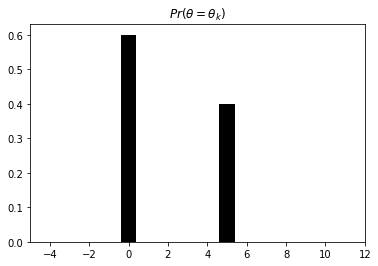

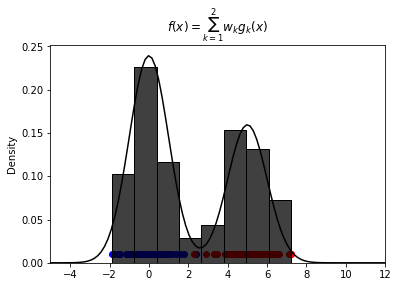

In [ ]:
# Generate data from a mixture with 2 components

KK = 2
w_true = [0.6, 0.4]
mu_true = np.zeros(KK)
mu_true[0] = 0
mu_true[1] = 5
sigma_true = 1

n = 120

x = []
cc = []
for i in range(n):
    c = np.random.choice(KK, 1, p = w_true)    
    x.extend(np.random.normal(mu_true[c], sigma_true, 1))
    cc.extend(c)

x = np.array(x)
cc = np.array(cc)

xx = np.linspace(-5, 12, 100)
yy = w_true[0]*norm(mu_true[0],sigma_true).pdf(xx) + w_true[1]*norm(mu_true[1],sigma_true).pdf(xx)

plt.bar(mu_true, w_true,  color = "black")
plt.title(r"$Pr(\theta = \theta_k)$")
plt.xlim(-5, 12)
plt.show()


sns.histplot(x, stat = "density", color = "black")

plt.scatter(x[cc==0],np.repeat(0.01, np.sum(cc==0)), color = "blue")
plt.scatter(x[cc==1], np.repeat(0.01, np.sum(cc==1)),color = "red")

plt.title(r"$f(x) = \sum_{k=1}^{2} w_k g_k(x)$")
plt.plot(xx, yy, c="black")
plt.xlim(-5,12)
plt.show()

In [ ]:
s = 0
sw = False


120

In [ ]:
len(x[cc==0])

75

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

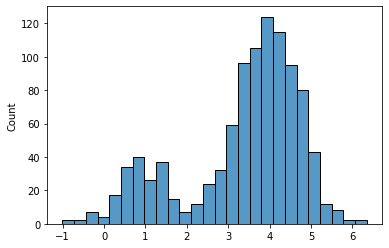

In [ ]:
# Sample

xi = [1,4]
pi = [0.2, 0.8]
sigma = 0.5

def generate_data(N, xi, pi, sigma):
  out = np.random.normal(xi[0], np.sqrt(sigma), int(N*pi[0]))
  J = np.repeat(0, int(N*pi[0]))
  for j in range(1,len(xi)):
    inputs = np.random.normal(xi[j], np.sqrt(sigma), int(N*pi[j]))
    out = np.append(out, inputs)
    J_in = np.repeat(j, int(N*pi[j]))
    J = np.append(J,J_in)
  return out, J

data, J = generate_data(1000, xi, pi,sigma)
sns.histplot(data)
plt.show()

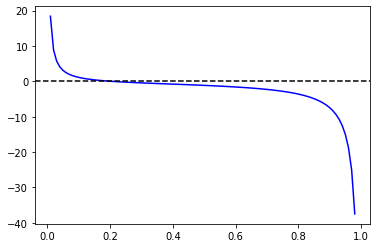

In [ ]:
# Sj(pi): 1th derivative
# fixed xi


def Sj(data, pi, j, m):
  norm1 = scipy.stats.norm(xi[j],sigma)
  norm2 = scipy.stats.norm(xi[m-1],sigma)
  out = (norm1.pdf(data) - norm2.pdf(data))/(pi*norm1.pdf(data)+(1-pi)*norm2.pdf(data))
  return np.mean(out)

y = []
pi = np.arange(0.01,0.99,0.01)
for k in pi:
  y.append(Sj(data, k, j = 0, m = 2))

plt.plot(pi, y, color = "blue")
plt.axhline(0, linestyle ="--", color="black")
plt.show()


In [ ]:
norm1 = scipy.stats.norm(xi[0],sigma)
norm2 = scipy.stats.norm(xi[1],sigma)

def denominator(data, pi):
  out = pi*norm1.pdf(data)+(1-pi)*norm2.pdf(data)
  return out

print(np.sum(norm2.pdf(data)/denominator(data, 0.3)))


1133.457039231077


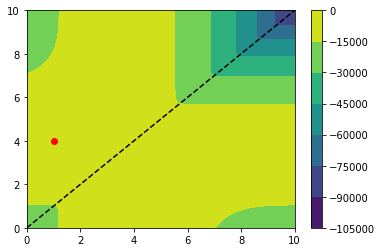

In [ ]:
xlist = np.linspace(0, 10, 100)
ylist = np.linspace(0, 10, 100)
X, Y = np.meshgrid(xlist, ylist)
pi = 0.2
def contour_l(data,X,Y):
  norm1 = scipy.stats.norm(X,sigma)
  norm2 = scipy.stats.norm(Y,sigma)
  out = np.log(pi*norm1.pdf(data[0]) + (1-pi)*norm2.pdf(data[0]))
  for i in range(len(data)):
    out += np.log(pi*norm1.pdf(data[i]) + (1-pi)*norm2.pdf(data[i]))
  return out

l = contour_l(data,X,Y)
cp = plt.contourf(X, Y, l)
plt.colorbar(cp) # Add a colorbar to a plot
plt.plot(xi[0],xi[1], marker="o", color = "red")
plt.plot(np.linspace(0,10,10),np.linspace(0,10,10), linestyle="--", color="black")
plt.show()

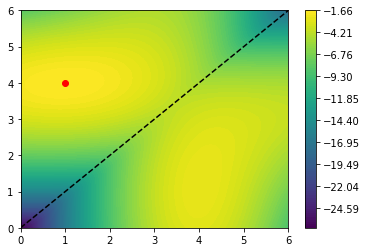

In [ ]:
min = 0
max = 6

xlist = np.linspace(min, max, 100)
ylist = np.linspace(min, max, 100)
X, Y = np.meshgrid(xlist, ylist)
pi =0.2

def contour_l(data,X,Y):
  norm1 = scipy.stats.norm(X,sigma)
  norm2 = scipy.stats.norm(Y,sigma)
  out = np.log(pi*norm1.pdf(data[0]) + (1-pi)*norm2.pdf(data[0]))
  for i in range(len(data)):
    out += np.log(pi*norm1.pdf(data[i]) + (1-pi)*norm2.pdf(data[i]))
  return out/len(data)

l = contour_l(data,X,Y)

cp = plt.contourf(X, Y, l,  levels = np.linspace(l.reshape(-1, 1).min(), l.reshape(-1, 1).max(), 100))

plt.colorbar(cp) # Add a colorbar to a plot
plt.plot(xi[0],xi[1], marker="o", color = "red")
plt.plot(np.linspace(min,max,10),np.linspace(min,max,10), linestyle="--", color="black")
plt.show()


- The full $m$ -component likelihood equations require solving for the full set of scores $\pi, \xi$ to zero

- Unfortunately, the full likelhood equations no longer need have unique solutions.

- And Complexity of Estimation will increase

- EM Algorithm is the easy-to-program to solve the likelihood equation

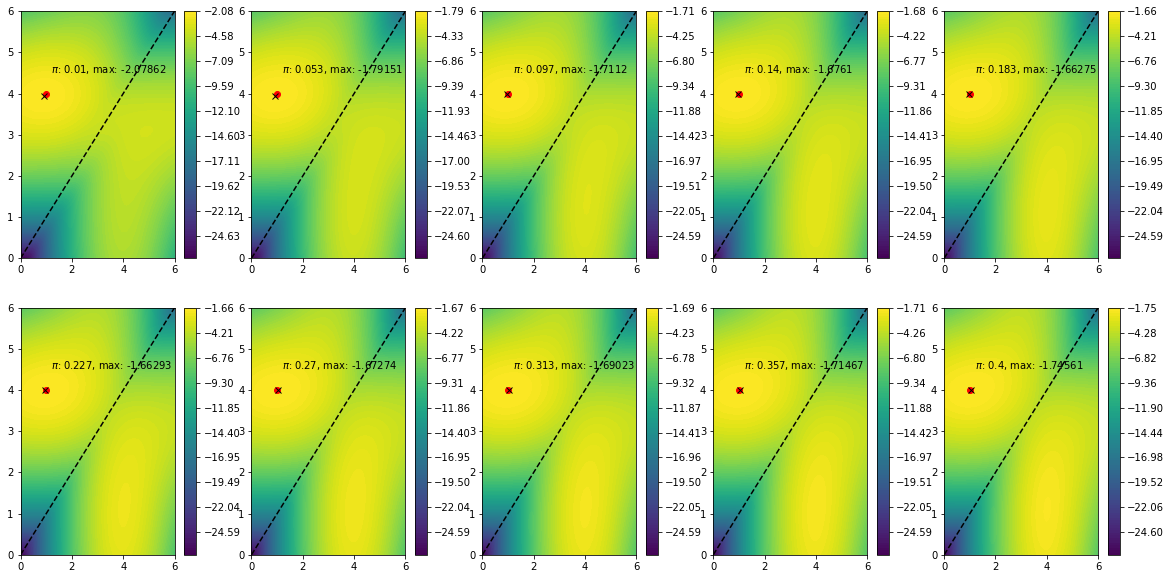

In [ ]:
def contour_l(data,X,Y,pi):
  norm1 = scipy.stats.norm(X,sigma)
  norm2 = scipy.stats.norm(Y,sigma)
  out = np.log(pi*norm1.pdf(data[0]) + (1-pi)*norm2.pdf(data[0]))
  for i in range(len(data)):
    out += np.log(pi*norm1.pdf(data[i]) + (1-pi)*norm2.pdf(data[i]))
  return out/len(data)


min = 0
max = 6
plt.figure(figsize = (20,10))
pi = np.linspace(0.01,0.4,10)
xlist = np.linspace(min, max, 100)
ylist = np.linspace(min, max, 100)
X, Y = np.meshgrid(xlist, ylist)

for i in range(len(pi)):
  l = contour_l(data,X,Y, pi[i])
  plt.subplot(2,5,i+1)
  cp = plt.contourf(X, Y, l,  levels = np.linspace(l.reshape(-1, 1).min(), l.reshape(-1, 1).max(), 100))
  plt.colorbar(cp) # Add a colorbar to a plot
  plt.plot(xi[0],xi[1], marker="o", color = "red")
  plt.plot(X.reshape(-1,1)[l.reshape(-1, 1).argmax()],Y.reshape(-1,1)[l.reshape(-1, 1).argmax()], marker = "x", color = "black")
  plt.plot(np.linspace(min,max,10),np.linspace(min,max,10), linestyle="--", color="black")
  plt.text(1.2,4.5,r"$\pi$: {}, max: {}".format(np.round(pi[i],3), np.round(l.reshape(-1, 1).max(),5)),color="black")

plt.show()

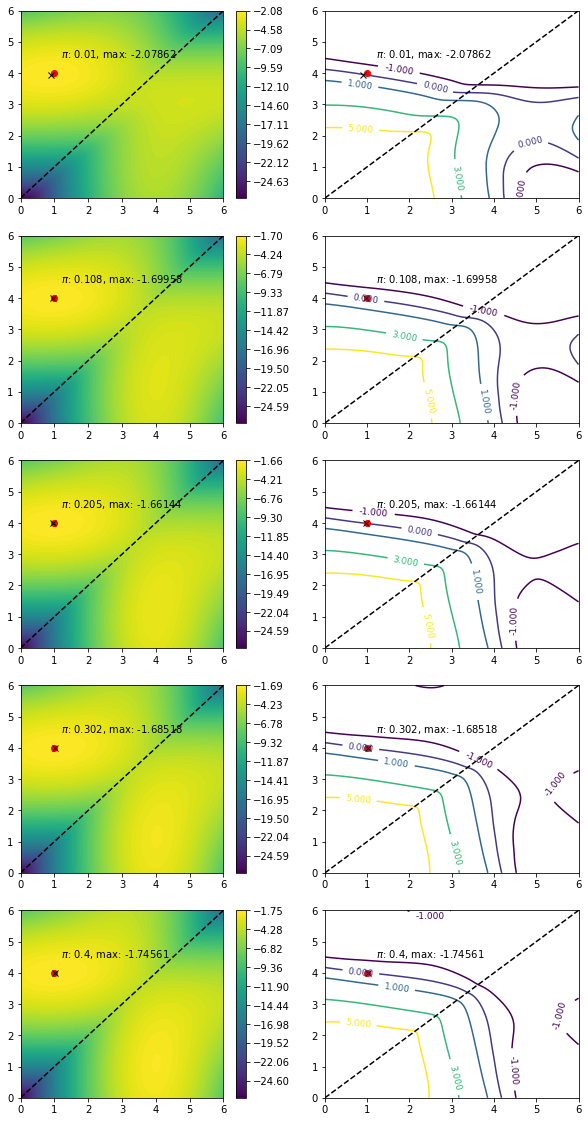

In [ ]:
min = 0
max = 6
plt.figure(figsize = (10,20))
pi = np.linspace(0.01,0.4,5)
xlist = np.linspace(min, max, 100)
ylist = np.linspace(min, max, 100)
X, Y = np.meshgrid(xlist, ylist)
diff = 0.0001

for i in range(len(pi)):
  l = contour_l(data,X,Y, pi[i])
  plt.subplot(5,2,2*i+1)
  cp = plt.contourf(X, Y, l,  levels = np.linspace(l.reshape(-1, 1).min(), l.reshape(-1, 1).max(), 100))
  plt.colorbar(cp) # Add a colorbar to a plot
  plt.plot(xi[0],xi[1], marker="o", color = "red")
  plt.plot(X.reshape(-1,1)[l.reshape(-1, 1).argmax()],Y.reshape(-1,1)[l.reshape(-1, 1).argmax()], marker = "x", color = "black")
  plt.plot(np.linspace(min,max,10),np.linspace(min,max,10), linestyle="--", color="black")
  plt.text(1.2,4.5,r"$\pi$: {}, max: {}".format(np.round(pi[i],3), np.round(l.reshape(-1, 1).max(),5)),color="black")

  l1 = contour_l(data,X-diff/2,Y-diff/2, pi[i])
  l2 = contour_l(data,X+diff/2,Y+diff/2, pi[i])
  slope = (l2-l1)/diff

  plt.subplot(5,2,2*i+2)
  CS = plt.contour(X, Y, slope,  levels = [-1,0,1,3,5])
  plt.clabel(CS, fontsize=9, inline=1)
  plt.plot(xi[0],xi[1], marker="o", color = "red")
  plt.plot(X.reshape(-1,1)[l.reshape(-1, 1).argmax()],Y.reshape(-1,1)[l.reshape(-1, 1).argmax()], marker = "x", color = "black")
  plt.plot(np.linspace(min,max,10),np.linspace(min,max,10), linestyle="--", color="black")
  plt.text(1.2,4.5,r"$\pi$: {}, max: {}".format(np.round(pi[i],3), np.round(l.reshape(-1, 1).max(),5)),color="black")

plt.show()

## 3.4. EM Algorithm

- Assume that all paramters are related to the  $ {f(x_i ; \xi_j) \over f(x_; Q_m) } = \gamma_{ij}$

- Process

1. Initialize parameters : $\xi^{(0)} , \pi^{(0)}$

2. Expectation Step ($t$ step)

<center>

$\gamma_{ij} ^{(t)} = {f(x_i ; \xi^{t}_{j}) \over f(x_i; Q_m) }$

$f(x_i ; \xi) = \pi^{(t-1)}_j f_j(x_i)$

</center>

3. Maximization Step ($t$ step)

<center>

$\xi_{j}^{(t)}$ is provided by $U_j (\xi , \pi) = 0$

In Gaussian Mixture Distribution with common variance,

$\mu_{j}^{(t)} = \sum_{i=1}^{N} \gamma_{ij} { \over }$


<br>


</center>

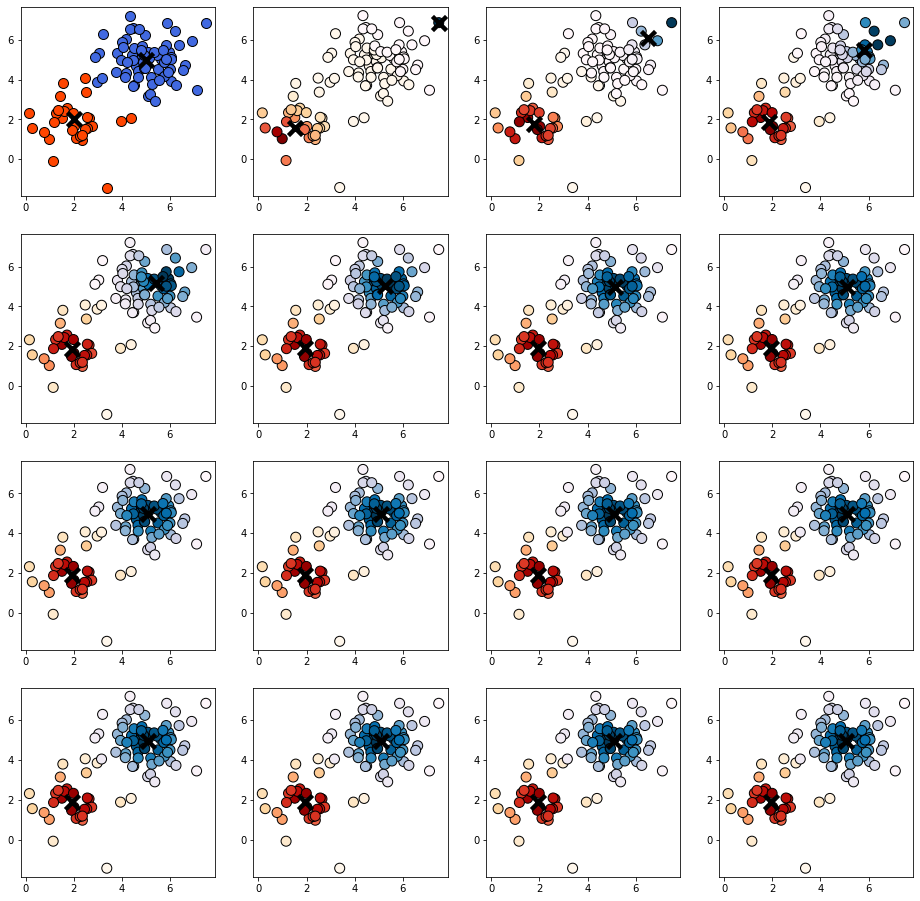

[0.01 0.01]


In [ ]:
# Multivariate Sampling

mu1 = [2,2]
mu2 = [5,5]
cov = [[1, 0], [0, 1]]
N = 100
pi = [0.3, 0.7]

data = np.random.multivariate_normal(mu1,cov,int(N*pi[0]))
classes = np.repeat(0,N*pi[0])
data = np.append(data, np.random.multivariate_normal(mu2, cov, int(N*pi[1])), axis=0)
classes = np.append(classes, np.repeat(1, N*pi[1]))

xi_t = np.array([[1,1],[12,10]])
pi_t = np.array([0.1,0.9])
plt.figure(figsize = (16,16))

plt.subplot(4,4,1)
plt.scatter(data[classes == 0,0],data[classes == 0,1], c= "orangered", s = 100, edgecolors = "k")
plt.scatter(data[classes == 1,0],data[classes == 1,1], c= "royalblue", s = 100, edgecolors = "k")
plt.scatter(mu1[0], mu1[1], color ="black", marker = "x", s = 10,  linewidth=20)
plt.scatter(mu2[0], mu2[1], color ="black", marker = "x", s = 10,  linewidth=20)

for i in range(15):
  plt.subplot(4,4,i+2)

  # Expectation Step
  gamma = []
  for j in range(xi_t.shape[0]):
    gam_in = pi_t[j] * scipy.stats.multivariate_normal.pdf(data, xi_t[j,:], cov)
    gamma.append(gam_in)

  gamma = np.array(gamma).T
  gamma = gamma/np.sum(gamma, axis = 0)
  z = np.argmax(gamma,axis=1)

  # Maximization Step
  Nk = np.sum(gamma, axis = 0)

  xi_t = gamma.T @ data / (Nk)
  pi_t = Nk / N

  plt.scatter(data[z == 0,0],data[z == 0,1], c= gamma[z == 0,0], cmap = "OrRd", s = 100, edgecolors = "k")
  plt.scatter(data[z == 1,0],data[z == 1,1], c= gamma[z == 1,1], cmap = "PuBu", s = 100, edgecolors = "k")
  plt.scatter(xi_t[0,0], xi_t[0,1], color ="black", marker = "x", s = 10,  linewidth=20)
  plt.scatter(xi_t[1,0], xi_t[1,1], color ="black", marker = "x", s = 10,  linewidth=20)

plt.show()
print(pi_t)


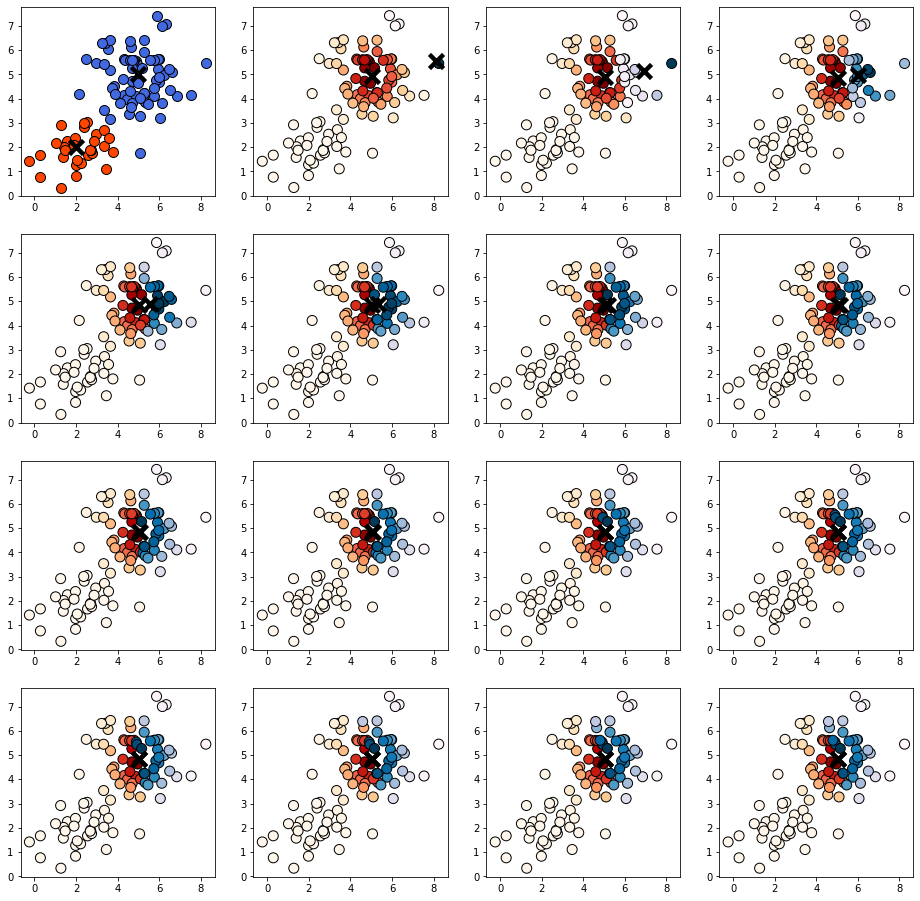

[0.01 0.01]


In [ ]:
# Multivariate Sampling

mu1 = [2,2]
mu2 = [5,5]
cov = [[1, 0], [0, 1]]
N = 100
pi = [0.3, 0.7]

data = np.random.multivariate_normal(mu1,cov,int(N*pi[0]))
classes = np.repeat(0,N*pi[0])
data = np.append(data, np.random.multivariate_normal(mu2, cov, int(N*pi[1])), axis=0)
classes = np.append(classes, np.repeat(1, N*pi[1]))

xi_t = np.array([[5,5],[12,10]])
pi_t = np.array([0.1,0.9])
plt.figure(figsize = (16,16))

plt.subplot(4,4,1)
plt.scatter(data[classes == 0,0],data[classes == 0,1], c= "orangered", s = 100, edgecolors = "k")
plt.scatter(data[classes == 1,0],data[classes == 1,1], c= "royalblue", s = 100, edgecolors = "k")
plt.scatter(mu1[0], mu1[1], color ="black", marker = "x", s = 10,  linewidth=20)
plt.scatter(mu2[0], mu2[1], color ="black", marker = "x", s = 10,  linewidth=20)

for i in range(15):
  plt.subplot(4,4,i+2)

  # Expectation Step
  gamma = []
  for j in range(xi_t.shape[0]):
    gam_in = pi_t[j] * scipy.stats.multivariate_normal.pdf(data, xi_t[j,:], cov)
    gamma.append(gam_in)

  gamma = np.array(gamma).T
  gamma = gamma/np.sum(gamma, axis = 0)
  z = np.argmax(gamma,axis=1)

  # Maximization Step
  Nk = np.sum(gamma, axis = 0)

  xi_t = gamma.T @ data / (Nk)
  pi_t = Nk / N

  plt.scatter(data[z == 0,0],data[z == 0,1], c= gamma[z == 0,0], cmap = "OrRd", s = 100, edgecolors = "k")
  plt.scatter(data[z == 1,0],data[z == 1,1], c= gamma[z == 1,1], cmap = "PuBu", s = 100, edgecolors = "k")
  plt.scatter(xi_t[0,0], xi_t[0,1], color ="black", marker = "x", s = 10,  linewidth=20)
  plt.scatter(xi_t[1,0], xi_t[1,1], color ="black", marker = "x", s = 10,  linewidth=20)

plt.show()
print(pi_t)



## 3.4.1 Decomposition fo EM Algorithm

$$  p(X | \theta) = \sum_Z p(X,Z | \theta)  \tag{3.4.1.1} $$

$$ log[p(X| \theta)] =  \mathcal{L} (q, \theta) + KL(q||p)   \tag{3.4.1.2} $$

where,

$$ \mathcal{L} (q, \theta) = \sum_Z q(Z) log \{ {p(X, Z |\theta )\over q(Z)} \}  \tag{3.4.1.3} $$

$$ KL(q||p) = - \sum_Z q(Z) log \{ {p(Z|X , \theta) \over q(Z)} \}  \tag{3.4.1.4} $$

since, 

$$ log [p(X, Z |\theta)] = log [p(Z|X,\theta) p(X|\theta)] = log[p(Z|X, \theta)] + log[p(X|\theta)]  \tag{3.4.1.5} $$

then,

$$ \mathcal{L} (q, \theta) = \sum_Z q(Z) log \{ {p(X, Z |\theta )\over q(Z)} \} \\  = \sum_Z q(Z) [log \{  p(Z|X,\theta) \} + log \{ p(X|\theta) \}  -log \{ q(Z) \} ] \\ = \sum_Z q(Z) \{  log {p (Z|X,\theta) \over q(Z)} + log [p(X|\theta)] \} \\ = KL(q||p) + \sum_Z q(Z) log[p(X|\theta)] \tag{3.4.1.6}  $$

thus,

$$ log[p(X|\theta)] = KL(q||p) + \sum_Z q(Z) log[p(X|\theta)]  - KL(q||p) \\ = log[p(X| \theta)] \tag{3.4.1.7}  $$ 

## 3.4.2 Kullback–Leibler divergence

- 식 (3.4.1.2)에서, $KL(q||p)$는 $q(Z)$와 사후 분포 $p(Z|X, \theta)$사이의 KL-divergence를 의미
- $KL(q||p)$는 0이상이며, $q(Z)$와 $p(Z|X, \theta)$가 같을 경우에만 성립
- $KL(q||p)$의 성질로 인해, $ \mathcal{L} (q, \theta) $는 $log[p(X|\theta)]$ 보다 클 수 없음

> $\Rightarrow$ 이전 M-step에서 구해진 $\theta^{old}$가 고정되어 있을 때, E-step에서는 우리가 찾고자 하는 사후확률 $q(Z)$는 하한값 $\mathcal{L} (q, \theta)$을 최대로 하는 값이 된다. 또한 다음 M-step에서 구해진 $\theta^{new}$로 인해 $KL(q||p)$는 증가하게 되므로, $log[p(X|\theta)]$가 커지게 된다. 최종적으로, 우리가 원하는 가능도 함수 $log[p(X|\theta)]$ 를 최대화하는 방향으로 모수를 추정하게 된다.

$$ \mathcal{L} (q, \theta) = \sum_Z q(Z) log \{ {p(X, Z |\theta )\over q(Z)} \}  \tag{3.4.1.3} $$

In [ ]:
# Multivariate Sampling

mu1 = [2,2]
mu2 = [5,5]
cov = [[1, 0], [0, 1]]
N = 100
pi = [0.3, 0.7]

data = np.random.multivariate_normal(mu1,cov,int(N*pi[0]))
classes = np.repeat(0,N*pi[0])
data = np.append(data, np.random.multivariate_normal(mu2, cov, int(N*pi[1])), axis=0)
classes = np.append(classes, np.repeat(1, N*pi[1]))

xi_t = np.array([[1,1],[12,10]])
pi_t = np.array([0.1,0.9])
plt.figure(figsize = (16,16))

plt.subplot(4,4,1)
plt.scatter(data[classes == 0,0],data[classes == 0,1], c= "orangered", s = 100, edgecolors = "k")
plt.scatter(data[classes == 1,0],data[classes == 1,1], c= "royalblue", s = 100, edgecolors = "k")
plt.scatter(mu1[0], mu1[1], color ="black", marker = "x", s = 10,  linewidth=20)
plt.scatter(mu2[0], mu2[1], color ="black", marker = "x", s = 10,  linewidth=20)

for i in range(15):
  plt.subplot(4,4,i+2)

  # Expectation Step
  gamma = []
  for j in range(xi_t.shape[0]):
    gam_in = pi_t[j] * scipy.stats.multivariate_normal.pdf(data, xi_t[j,:], cov)
    gamma.append(gam_in)

  gamma = np.array(gamma).T
  gamma = gamma/np.sum(gamma, axis = 0)
  z = np.argmax(gamma,axis=1)


  # Maximization Step
  Nk = np.sum(gamma, axis = 0)

  xi_t = gamma.T @ data / (Nk)
  pi_t = Nk / N

#   plt.scatter(data[z == 0,0],data[z == 0,1], c= gamma[z == 0,0], cmap = "OrRd", s = 100, edgecolors = "k")
#   plt.scatter(data[z == 1,0],data[z == 1,1], c= gamma[z == 1,1], cmap = "PuBu", s = 100, edgecolors = "k")
#   plt.scatter(xi_t[0,0], xi_t[0,1], color ="black", marker = "x", s = 10,  linewidth=20)
#   plt.scatter(xi_t[1,0], xi_t[1,1], color ="black", marker = "x", s = 10,  linewidth=20)

plt.show()
print(pi_t)


In [ ]:
(data[z == 0, 0]

array([ 0.69531174,  2.16598655,  1.80858513,  2.33284491,  1.11885715,
        1.78373766,  0.93519809, -0.04884383,  1.98690536,  3.12336977,
        2.93961562,  3.28426336,  1.23953968,  2.11337855,  0.82030466,
        2.16484206,  3.76451633,  2.91276462,  0.82258839,  2.24016177,
        1.72742476,  1.50672271,  2.64485177,  0.68251901,  1.48590448,
        3.03372848,  1.25547808,  3.39294705,  2.32703046,  1.38641805,
        4.64835546,  5.47464473,  5.79043719,  4.63093406,  6.47254442,
        5.25861769,  5.23528559,  6.1597    ,  6.4126899 ,  4.19957807,
        6.13396807,  4.5998136 ,  4.69488532,  4.58780311,  5.14626145,
        5.07338775,  3.82421554,  4.77854864,  3.39322367,  5.99801668,
        3.17201322,  4.27986339,  3.67605499,  5.19656268,  5.30730007,
        6.15390339,  4.45705758,  6.23791012,  6.13451085,  3.47491499,
        5.64753324,  5.09352858,  2.97303967,  4.24947013,  3.36823014,
        5.4851127 ,  4.26131085,  6.6220186 ,  7.19080872])

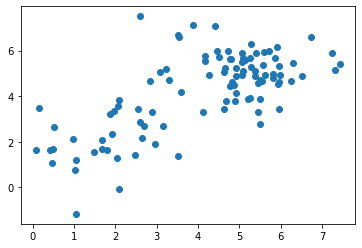

In [ ]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [ ]:
Nk

array([1., 1.])